In [1]:
# Sample code to reproduce the problem
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
from river import stream
from river import preprocessing, linear_model, optim

In [2]:
print("Boston housing dataset prediction.")
boston = load_boston()
boston_data, boston_target = boston.data, boston.target

df_X = pd.DataFrame(boston_data, columns=boston.feature_names)
df_y = pd.Series(boston_target)

Boston housing dataset prediction.


/Users/seshu/opt/anaconda3/envs/sail3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Cal

In [3]:
###### One
xtrain, xtest, ytrain, ytest = train_test_split(df_X, df_y, test_size=0.2, random_state=42)
stdScaler = preprocessing.StandardScaler()

model = linear_model.LinearRegression(
                 optimizer=optim.RMSProp())

dataset = stream.iter_pandas(xtrain, ytrain)

for x, yi in dataset:
    stdScaler.learn_one(x)
    x = stdScaler.transform_one(x)
    model.learn_one(x, yi)

ypred_one = []
dataset = stream.iter_pandas(xtest, ytest)

for x, yi in dataset:
    x = stdScaler.transform_one(x)
    ypred_one.append(model.predict_one(x))




In [4]:
##### Many

xtrain, xtest, ytrain, ytest = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

stdScaler_many = preprocessing.StandardScaler()

model_many = linear_model.LinearRegression(
                 optimizer=optim.RMSProp())

dataset = stream.iter_pandas(xtrain, ytrain)

x = xtrain
yi = ytrain

stdScaler_many.learn_many(x)
x = stdScaler_many.transform_many(x)
model_many.learn_many(x, yi)

ypred_many = []
dataset = stream.iter_pandas(xtest, ytest)

x = xtest
x = stdScaler_many.transform_many(x)
ypred_many = model_many.predict_many(x)


In [5]:
mse = mean_squared_error(ytest, ypred_one)
print("MSE_one: ", mse)
print("RMSE_one: ", mse*(1/2.0))



mse = mean_squared_error(ytest, ypred_many)
print("MSE_many: ", mse)
print("RMSE_many: ", mse*(1/2.0))



MSE_one:  26.609623375292134
RMSE_one:  13.304811687646067
MSE_many:  505.2817051566025
RMSE_many:  252.64085257830126


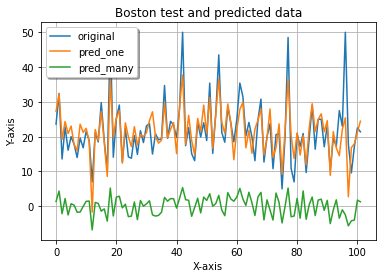

In [6]:
x_ax = range(len(ytest))
plt.plot(x_ax, ytest, label="original")
plt.plot(x_ax, ypred_one, label="pred_one")
plt.plot(x_ax, ypred_many, label="pred_many")
plt.title("Boston test and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()